# Task2 - Develop a model that can classify Iris flowers into different species based on their sepal and petal measurements

## Understanding the Data

In [65]:
import pandas as pd

In [66]:
iris_data = pd.read_csv('IRIS.csv')
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [67]:
iris_data.shape

(150, 5)

In [68]:
#Checking the datatypes
iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [75]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
#Checking how many species of Iris flower is given
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [77]:
#Checking for null values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [78]:
#Grouping the Data with respect to Species
iris_data.groupby(by = 'species')['sepal_length'].mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [79]:
iris_data.groupby(by = 'species')['sepal_width'].mean()

species
Iris-setosa        3.418
Iris-versicolor    2.770
Iris-virginica     2.974
Name: sepal_width, dtype: float64

In [80]:
iris_data.groupby(by = 'species')['petal_width'].mean()

species
Iris-setosa        0.244
Iris-versicolor    1.326
Iris-virginica     2.026
Name: petal_width, dtype: float64

In [81]:
iris_data.groupby(by = 'species')['petal_length'].mean()

species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64

### The Provided Data is Clean

## Visualizing the Data

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

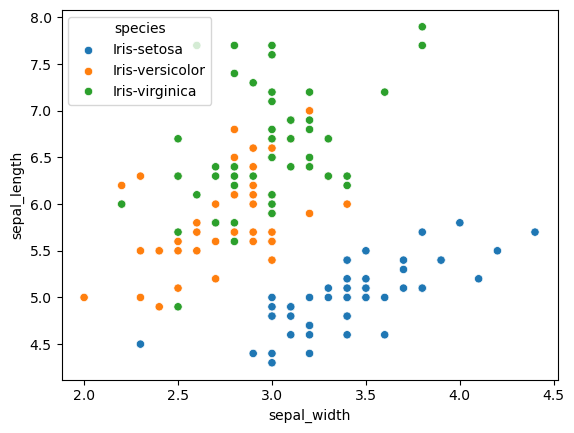

In [83]:
#sepal_length V/S sepal_width
sns.scatterplot(x = iris_data['sepal_width'], y = iris_data['sepal_length'], hue = iris_data['species'])
plt.show()

### Outliers detected : iris_sentosa -> sepal_width < 2.5 & iris_virginica -> sepal_width > 3.5 & iris_versica -> sepal_width < 2

In [84]:
#Removing the outliers
iris_data = iris_data[~((iris_data['species'] == 'Iris-setosa') & (iris_data['sepal_width'] < 3))]
iris_data = iris_data[~((iris_data['species'] == 'Iris-virginica') & (iris_data['sepal_width'] > 3.5))]
iris_data = iris_data[~((iris_data['species'] == 'Iris-virginica') & (iris_data['sepal_width'] < 2.5))]
iris_data = iris_data[~((iris_data['species'] == 'Iris-versicolor') & (iris_data['sepal_width'] <= 2))]
iris_data = iris_data[~((iris_data['species'] == 'Iris-virginica') & (iris_data['sepal_length'] < 5.5))]
iris_data.shape

(142, 5)

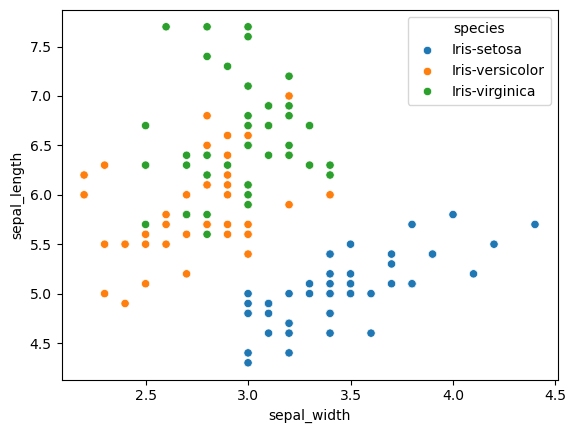

In [101]:
sns.scatterplot(x = iris_data['sepal_width'], y = iris_data['sepal_length'], hue = iris_data['species'])
plt.show()

### From the graph

1. Sepal width of iris sentosa is in range of 3 - 4.5
2. Sepal length of iris sentosa is in range of 4 - 6
3. Sepal width of iris versicolor is in range of 2 - 3.5
4. Sepal length of iris versicolor is in range of 4.5 - 7
5. Sepal width of iris virginica is in range of 2 - 3.5
6. Sepal length of iris virginica is in range of 5.5 - 8

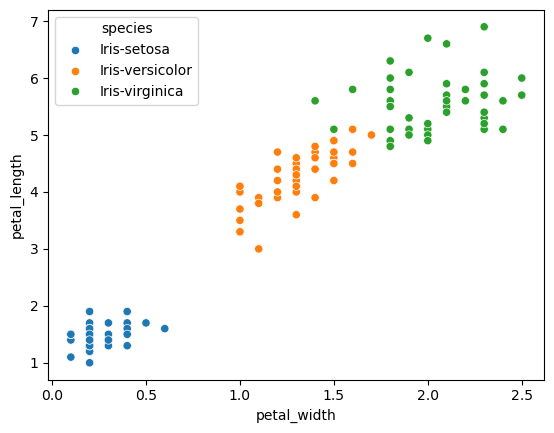

In [86]:
#sepal_length V/S sepal_width
sns.scatterplot(x = iris_data['petal_width'], y = iris_data['petal_length'], hue = iris_data['species'])
plt.show()

### Outliers found for the petal width of iris virginica

In [87]:
#Removing the outliers
iris_data = iris_data[~((iris_data['species'] == 'Iris-virginica') & (iris_data['petal_width'] < 1.7))]
iris_data.shape

(139, 5)

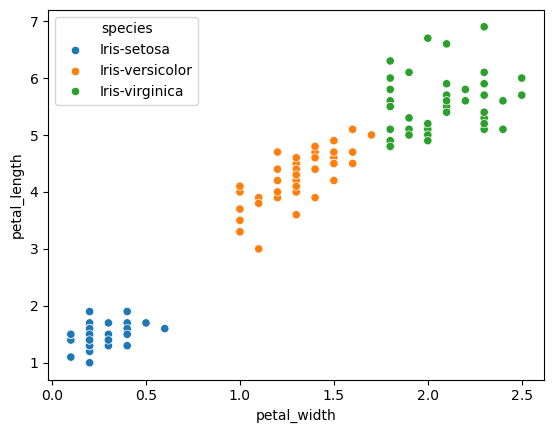

In [88]:
sns.scatterplot(x = iris_data['petal_width'], y = iris_data['petal_length'], hue = iris_data['species'])
plt.show()

### Removed all the outliers

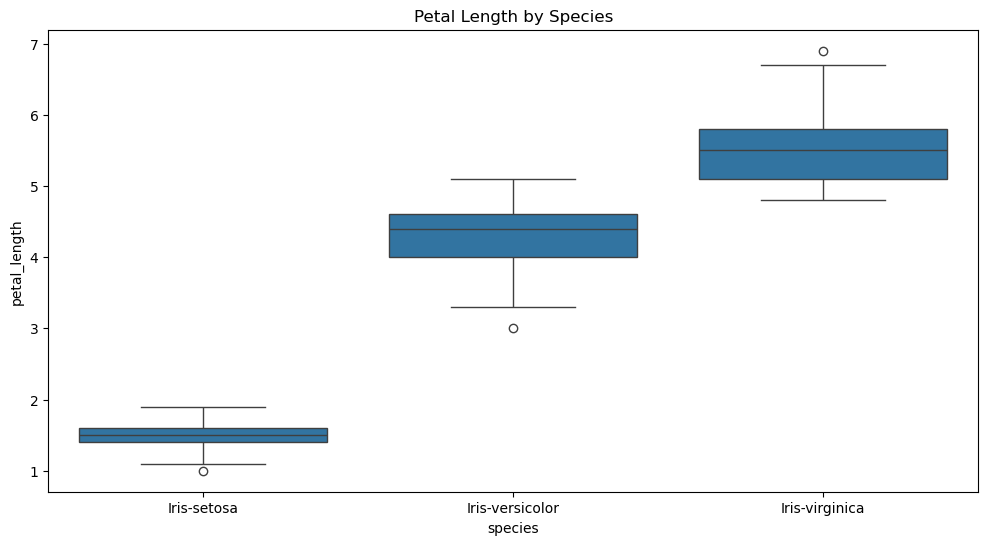

In [102]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris_data, x='species', y='petal_length')
plt.title("Petal Length by Species")
plt.show()

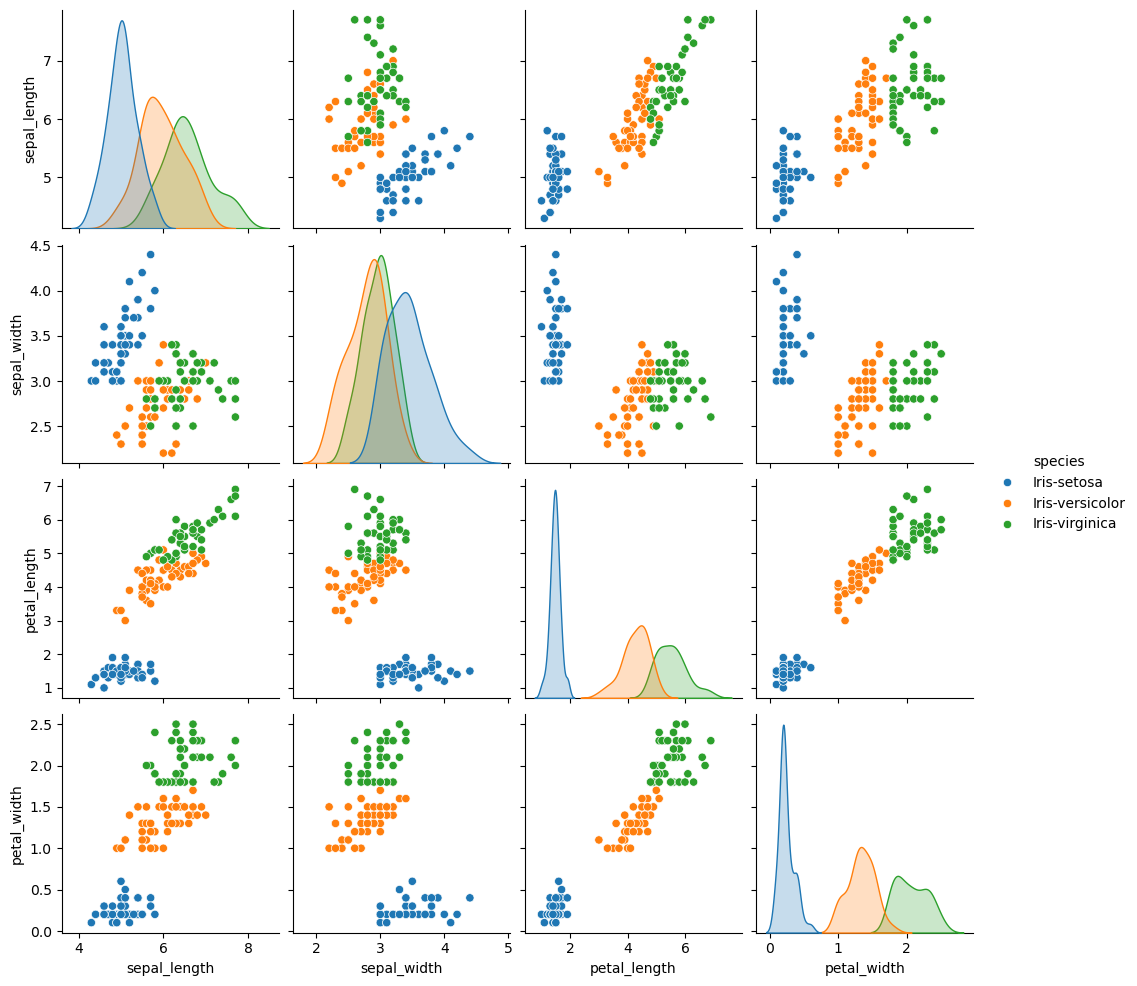

In [103]:
sns.pairplot(iris_data, hue='species', diag_kind='kde')
plt.show()

## Building the model to identify the species using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [92]:
x = iris_data.drop('species', axis = 1)
y = iris_data['species']

In [93]:
#Splitting the data to train and test by 80/20 method
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

In [95]:
#Training the Logistic Regression model
model = LogisticRegression(solver = 'lbfgs', max_iter = 200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [96]:
#Evaluating the test set
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.96        28
      macro avg       0.96      0.97      0.96        28
   weighted avg       0.97      0.96      0.96        28



## Prediction of a new Sample

In [100]:
sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
prediction = model.predict(sample)
print("Predicted species:", prediction[0])

Predicted species: Iris-setosa
